# Exercise 1 - introducing correlations 

Let's look at the relationship between FERTILITY and LIFE EXPECTANCY. For this we'll use the gapminder dataset

In [2]:
install.packages('dplyr')
install.packages('ggplot2')
install.packages('dslabs')

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)



In [3]:
library(dplyr)
library(ggplot2)
library(dslabs)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [6]:
data(gapminder)
head(gapminder) # always being with looking at the data

,country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,Albania,1960,115.40,62.87,6.19,1636054,NA,Europe,Southern Europe
2,Algeria,1960,148.20,47.50,7.65,11124892,13828152297,Africa,Northern Africa
3,Angola,1960,208.00,35.98,7.32,5270844,NA,Africa,Middle Africa
4,Antigua and Barbuda,1960,NA,62.97,4.43,54681,NA,Americas,Caribbean
5,Argentina,1960,59.87,65.39,3.11,20619075,108322326649,Americas,South America
6,Armenia,1960,NA,66.86,4.55,1867396,NA,Asia,Western Asia


Let's restrict our question a bit, and start by looking just at the year 2000

In [7]:
dat2000 <- gapminder %>%
    filter(year == 2000)
str(dat2000)

'data.frame':	185 obs. of  9 variables:
 $ country         : Factor w/ 185 levels "Albania","Algeria",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ year            : int  2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 ...
 $ infant_mortality: num  23.2 33.9 128.3 13.8 18 ...
 $ life_expectancy : num  74.7 73.3 52.3 73.8 74.2 ...
 $ fertility       : num  2.38 2.51 6.84 2.32 2.48 1.3 1.87 1.76 1.37 2.05 ...
 $ population      : num  3121965 31183658 15058638 77648 37057453 ...
 $ gdp             : num  3.69e+09 5.48e+10 9.13e+09 8.03e+08 2.84e+11 ...
 $ continent       : Factor w/ 5 levels "Africa","Americas",..: 4 1 1 2 2 3 2 5 4 3 ...
 $ region          : Factor w/ 22 levels "Australia and New Zealand",..: 19 11 10 2 15 21 2 1 22 21 ...


Let's start by just looking at the correlation. The best way to start is to visualise the relationship

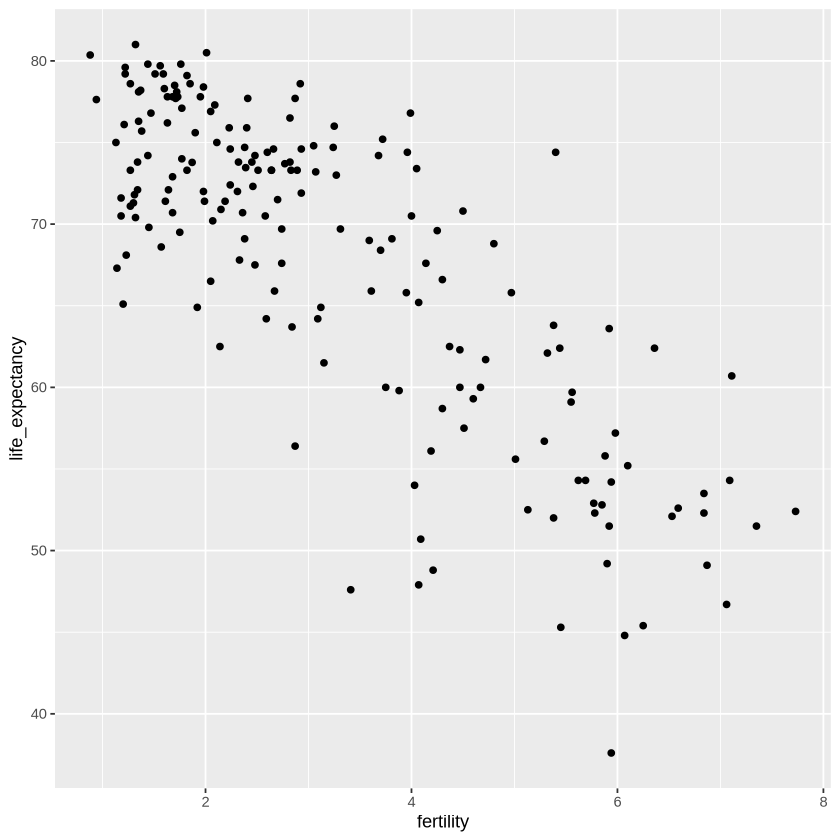

In [8]:
# before any tests, we want to visualise the data

ggplot(dat2000,
        aes(x = fertility,
            y = life_expectancy)) +
    geom_point()

Let's look at another question. What about the relationship between population and life expectancy?

Let's start by just looking at the correlation. The best way to start is to visualise the relationship

In [10]:
# taking the two coloums we want to check the correlation with
cor.test(dat2000$life_expectancy, dat2000$fertility)


	Pearson's product-moment correlation

data:  dat2000$life_expectancy and dat2000$fertility
t = -18.118, df = 183, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8475820 -0.7429083
sample estimates:
       cor 
-0.8012954 


In [ ]:
# The correlation is -0.8012954 = negative correlatio = y goes up as x goes down (as seen in the plot)

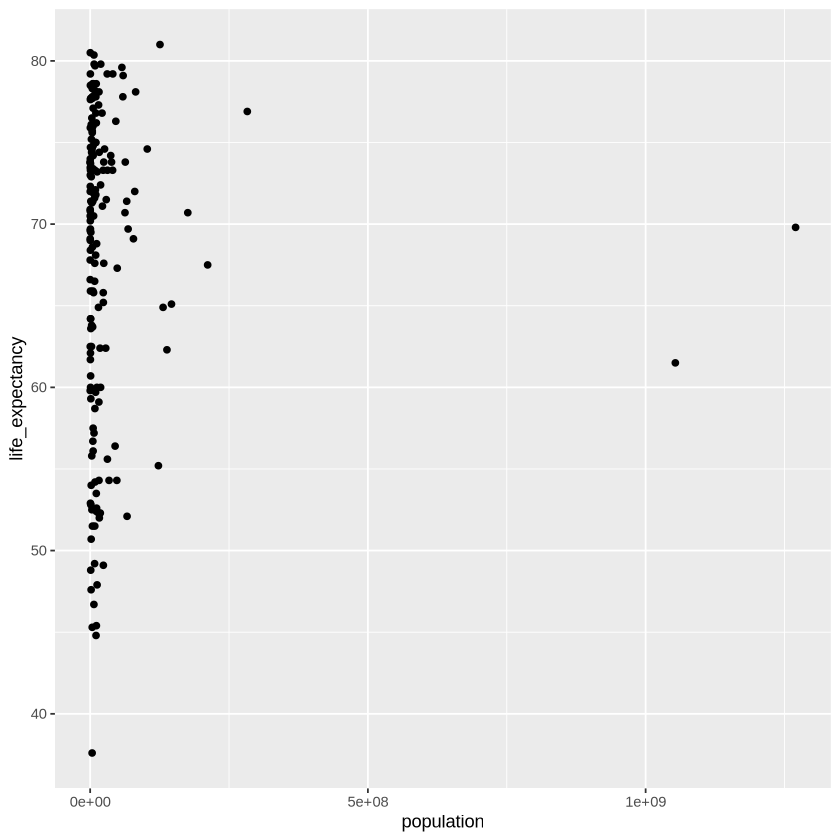

In [14]:
# We look at two other coloums
ggplot(dat2000,
       aes(x = population,
           y = life_expectancy)) +
    geom_point()

This plot is hard to read due to the two very high data points, let's censor them

Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”


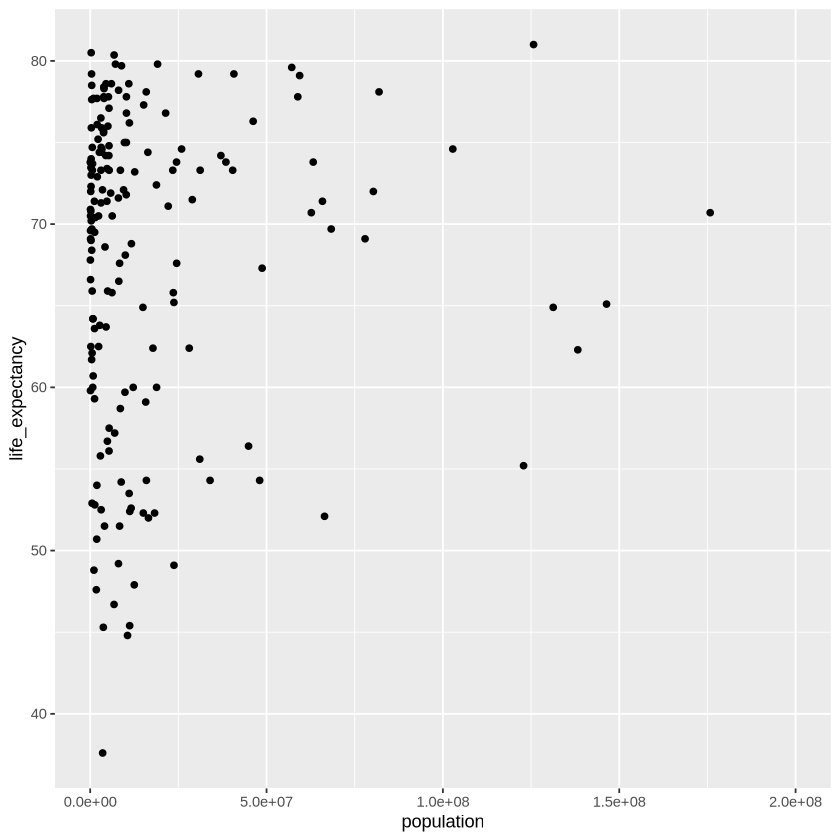

In [16]:
# We set a limit to the x-axe. On the left side we want it to be 0, and right side 2 followed by 8 zeros = 200000000
ggplot(dat2000,
       aes(x = population,
           y = life_expectancy)) +
    geom_point() +
    xlim(0, 2e8)

In [19]:
# From the plot its looks like the correlation is gonna be close to 0, since there is no pattern
# We test is formally to see if we are right

cor.test(dat2000$life_expectancy, dat2000$population)


	Pearson's product-moment correlation

data:  dat2000$life_expectancy and dat2000$population
t = 0.0056327, df = 183, p-value = 0.9955
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1438609  0.1446763
sample estimates:
         cor 
0.0004163806 


In [20]:
# Correlation is = 0.0004. Besides that, the p-value is high and the data is everywhere.
# there is no correlation here

Let's apply linear models to both of these relationships

In [21]:
# lm = linear model. Specify the data we're using in the end)
fertility_model <- lm(life_expectancy ~ fertility, dat2000)
summary(fertility_model)


Call:
lm(formula = life_expectancy ~ fertility, data = dat2000)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.411  -3.623   1.071   3.836  16.247 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  82.1892     0.9002   91.30   <2e-16 ***
fertility    -4.4512     0.2457  -18.12   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.751 on 183 degrees of freedom
Multiple R-squared:  0.6421,	Adjusted R-squared:  0.6401 
F-statistic: 328.3 on 1 and 183 DF,  p-value: < 2.2e-16


In [22]:
# there seems to be a significant relation between fertility and life expectancy
# if fertility is set to 0 then life expectancy is set to 0 as well
# this correlates to the test we made between life expectancy and fertility in the beginning (with negative correlation)

In [23]:
# Now we want to look at life expectancy in populations

population_model <- lm(life_expectancy ~ population, dat2000)
summary(population_model)


Call:
lm(formula = life_expectancy ~ population, data = dat2000)

Residuals:
   Min     1Q Median     3Q    Max 
-30.19  -6.09   3.01   6.91  13.21 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.779e+01  7.303e-01  92.826   <2e-16 ***
population  3.197e-11  5.677e-09   0.006    0.996    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.613 on 183 degrees of freedom
Multiple R-squared:  1.734e-07,	Adjusted R-squared:  -0.005464 
F-statistic: 3.173e-05 on 1 and 183 DF,  p-value: 0.9955


In [24]:
# The relation between the correlation is coeffecient = how much of the varians is exlained = multiple R-squared

# Exercise 2 - interpreting linear models  

Let's go back to last week. We had a question about the influence of number of cylinders on fuel economy. Let's load the data and return to that question

In [25]:
install.packages('fueleconomy')

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)



In [26]:
library(fueleconomy)

In [29]:
data(vehicles)
str(vehicles)

tibble [33,442 × 12] (S3: tbl_df/tbl/data.frame)
 $ id   : num [1:33442] 13309 13310 13311 14038 14039 ...
 $ make : chr [1:33442] "Acura" "Acura" "Acura" "Acura" ...
 $ model: chr [1:33442] "2.2CL/3.0CL" "2.2CL/3.0CL" "2.2CL/3.0CL" "2.3CL/3.0CL" ...
 $ year : num [1:33442] 1997 1997 1997 1998 1998 ...
 $ class: chr [1:33442] "Subcompact Cars" "Subcompact Cars" "Subcompact Cars" "Subcompact Cars" ...
 $ trans: chr [1:33442] "Automatic 4-spd" "Manual 5-spd" "Automatic 4-spd" "Automatic 4-spd" ...
 $ drive: chr [1:33442] "Front-Wheel Drive" "Front-Wheel Drive" "Front-Wheel Drive" "Front-Wheel Drive" ...
 $ cyl  : num [1:33442] 4 4 6 4 4 6 4 4 6 5 ...
 $ displ: num [1:33442] 2.2 2.2 3 2.3 2.3 3 2.3 2.3 3 2.5 ...
 $ fuel : chr [1:33442] "Regular" "Regular" "Regular" "Regular" ...
 $ hwy  : num [1:33442] 26 28 26 27 29 26 27 29 26 23 ...
 $ cty  : num [1:33442] 20 22 18 19 21 17 20 21 17 18 ...


Let's isolate the relevant data again for Audi and VW midsizes

In [31]:
# & operator = both statements need to be true
# or operator = one statement just needs to be true

Audi_VW <- vehicles %>%
    filter(make == "Audi" & class == "Midsize Cars" | make == "Volkswagen" & class == "Midsize Cars")
str(Audi_VW)

tibble [254 × 12] (S3: tbl_df/tbl/data.frame)
 $ id   : num [1:254] 5656 5657 6784 6785 7908 ...
 $ make : chr [1:254] "Audi" "Audi" "Audi" "Audi" ...
 $ model: chr [1:254] "100" "100" "100" "100" ...
 $ year : num [1:254] 1989 1989 1990 1990 1991 ...
 $ class: chr [1:254] "Midsize Cars" "Midsize Cars" "Midsize Cars" "Midsize Cars" ...
 $ trans: chr [1:254] "Automatic 3-spd" "Manual 5-spd" "Automatic 3-spd" "Automatic 4-spd" ...
 $ drive: chr [1:254] "Front-Wheel Drive" "Front-Wheel Drive" "Front-Wheel Drive" "Front-Wheel Drive" ...
 $ cyl  : num [1:254] 5 5 5 5 5 6 6 6 6 6 ...
 $ displ: num [1:254] 2.3 2.3 2.3 2.3 2.3 2.8 2.8 2.8 2.8 2.8 ...
 $ fuel : chr [1:254] "Regular" "Regular" "Regular" "Regular" ...
 $ hwy  : num [1:254] 20 23 20 22 22 23 22 24 22 24 ...
 $ cty  : num [1:254] 17 16 16 16 16 15 17 17 17 17 ...


Let's use linear models to investigate the effect of number of cylinders on fuel economy in both makes

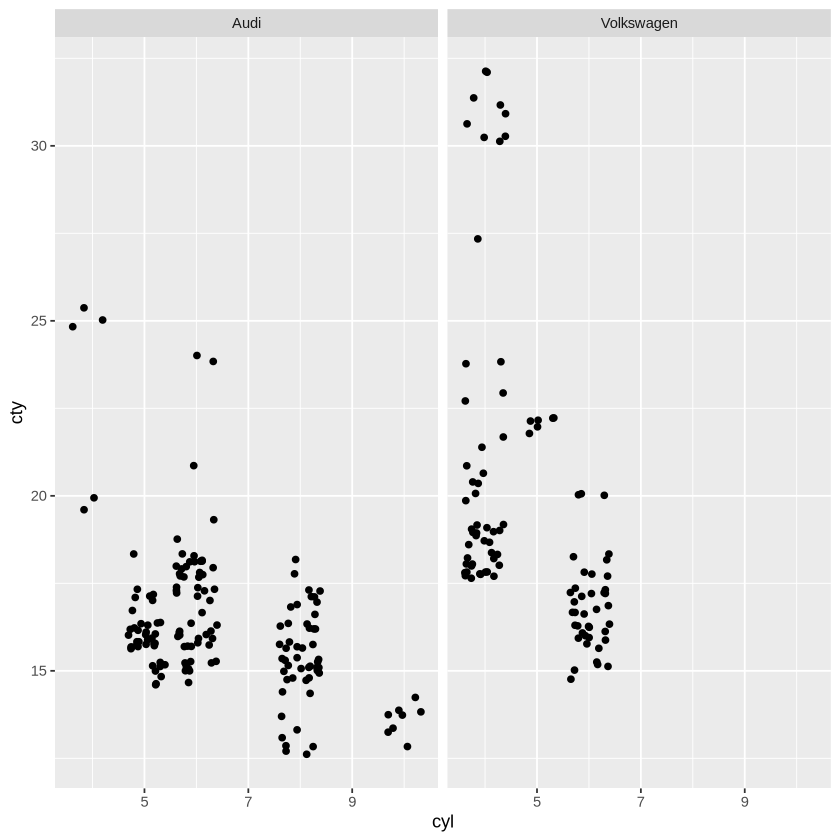

In [35]:
# number of cylinders on the x-axe and the fuel effieceny of the city in the y-axes
# we make the jitter in case they overlap

ggplot(Audi_VW,
       aes(x = cyl,
           y = cty)) +
    geom_point(position = 'jitter') +
    facet_wrap( ~make)

In [38]:
# subset = taking a subset of our data, and specifying what data we want the subset to be taken from
summary(lm(cty ~ cyl, data = subset(Audi_VW, make == "Volkswagen")))


Call:
lm(formula = cty ~ cyl, data = subset(Audi_VW, make == "Volkswagen"))

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6857 -2.6857 -0.9993  1.0007 10.3143 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  31.0586     1.9056  16.298  < 2e-16 ***
cyl          -2.3432     0.3826  -6.124 2.05e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.625 on 95 degrees of freedom
Multiple R-squared:  0.283,	Adjusted R-squared:  0.2755 
F-statistic:  37.5 on 1 and 95 DF,  p-value: 2.048e-08


In [39]:
# there is a pretty strong correlation
# = The more cylinders a car has, the less miles pr gallon the car will run

In [42]:
# the relationship is in the same direction as with the volkswagen.
# the numbers are slight different, but also shows more cylinders = less miles pr. gallon

In [41]:
summary(lm(cty ~ cyl, data = subset(Audi_VW, make == "Audi")))


Call:
lm(formula = cty ~ cyl, data = subset(Audi_VW, make == "Audi"))

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3136 -1.3136 -0.2938  0.7062  7.3596 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  20.6801     0.6687  30.927  < 2e-16 ***
cyl          -0.6733     0.1001  -6.727 3.16e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.849 on 155 degrees of freedom
Multiple R-squared:  0.226,	Adjusted R-squared:  0.221 
F-statistic: 45.25 on 1 and 155 DF,  p-value: 3.156e-10


Let's look at this INTERACTION between variables WITHIN THE MODEL

In [44]:
# Looing at the city effiency in relation to cylinders based on the vehicles dataset
summary(lm(cty ~ cyl * make, Audi_VW))


Call:
lm(formula = cty ~ cyl * make, data = Audi_VW)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6857 -1.3136 -0.3136  1.0007 10.3143 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         20.6801     0.9645  21.440  < 2e-16 ***
cyl                 -0.6733     0.1444  -4.663 5.07e-06 ***
makeVolkswagen      10.3785     1.7018   6.099 4.04e-09 ***
cyl:makeVolkswagen  -1.6699     0.3164  -5.278 2.83e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.667 on 250 degrees of freedom
Multiple R-squared:  0.4235,	Adjusted R-squared:  0.4166 
F-statistic: 61.23 on 3 and 250 DF,  p-value: < 2.2e-16


Let's go back to this question about which model is better. We can do this using model comparison. Let's build a model without make, and one with, and see what we learn

In [48]:
# Model 1: fuel efficieny predicted by numbers of cylinders based on all cars
m1 <- lm(cty ~ cyl, Audi_VW)

# Model 2: fuel efficiency, cylinders based on the car brand
m2 <- lm(cty ~ cyl + make, Audi_VW)

# Model 3: how many cylinders based on car brand
m3 <- lm(cty ~ cyl * make, Audi_VW)

# we are making whats called a f-test, to assess whether the variances of models are equal.
anova(m1, m2, m3)


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,252,2095.761,NA,NA,NA,NA
2,251,1976.324,1,119.4377,16.79231,5.639271e-05
3,250,1778.161,1,198.1631,27.86068,2.829931e-07


# Exercise 3 - non-linear predictors

Lets look at the relationship infant mortality and life expectancy in the year 2000 what do you notice?

Warning message:
“Removed 7 rows containing missing values or values outside the scale range
(`geom_point()`).”


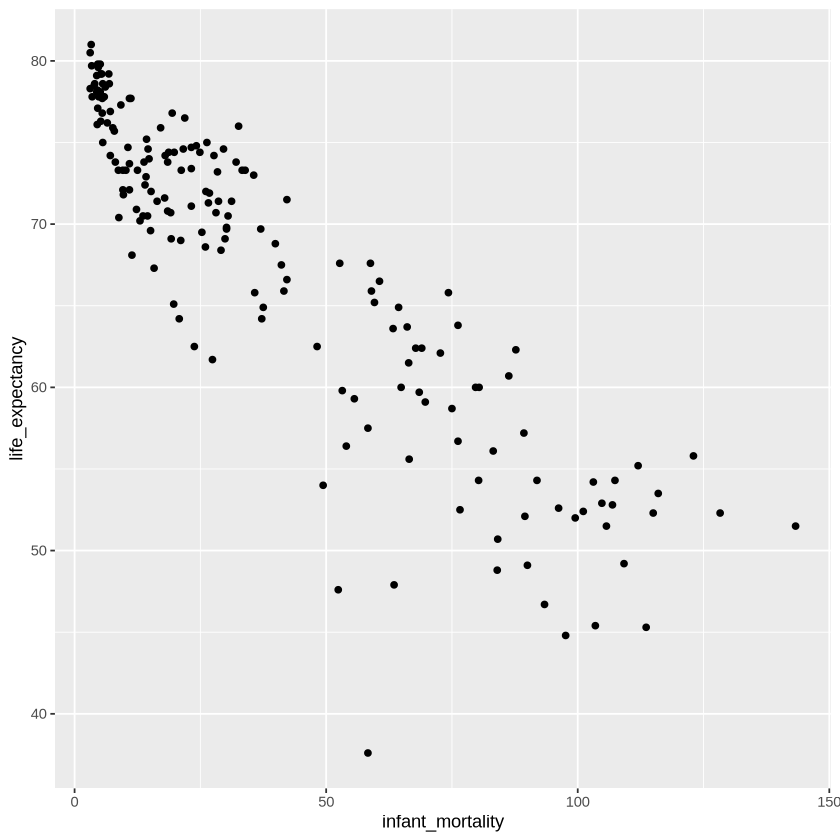

In [49]:
# x is the predictor variable and y is the outcome variable
ggplot(dat2000, 
       aes(x = infant_mortality,
           y = life_expectancy)) +
    geom_point()

In [51]:
# the result looks more like an curve rather than a line
# we create a new coloumn in our dataset through the original coloum, and square it in the end (^2)

dat2000$infant_mortality2 <- dat2000$infant_mortality^2
str(dat2000)

'data.frame':	185 obs. of  10 variables:
 $ country          : Factor w/ 185 levels "Albania","Algeria",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ year             : int  2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 ...
 $ infant_mortality : num  23.2 33.9 128.3 13.8 18 ...
 $ life_expectancy  : num  74.7 73.3 52.3 73.8 74.2 ...
 $ fertility        : num  2.38 2.51 6.84 2.32 2.48 1.3 1.87 1.76 1.37 2.05 ...
 $ population       : num  3121965 31183658 15058638 77648 37057453 ...
 $ gdp              : num  3.69e+09 5.48e+10 9.13e+09 8.03e+08 2.84e+11 ...
 $ continent        : Factor w/ 5 levels "Africa","Americas",..: 4 1 1 2 2 3 2 5 4 3 ...
 $ region           : Factor w/ 22 levels "Australia and New Zealand",..: 19 11 10 2 15 21 2 1 22 21 ...
 $ infant_mortality2: num  538 1149 16461 190 324 ...


Warning message:
“Removed 7 rows containing missing values or values outside the scale range
(`geom_point()`).”


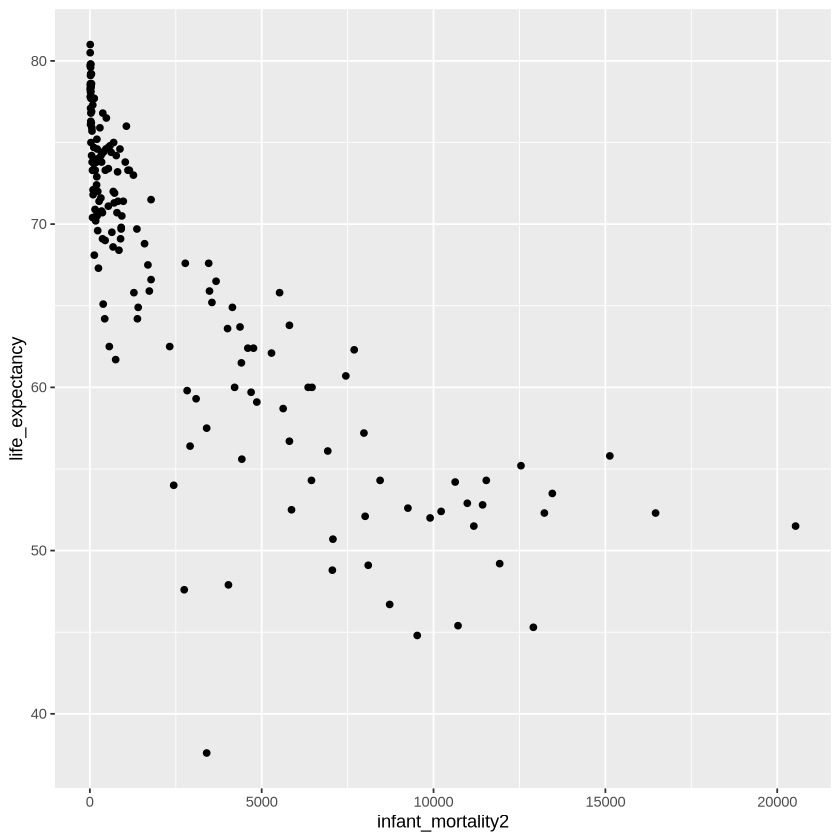

In [54]:
# plotting it to see how the data is visualised now
ggplot(dat2000, 
       aes(x = infant_mortality2,
           y = life_expectancy)) +
    geom_point()

In [55]:
# building a different model 
m1 <- lm(life_expectancy ~ infant_mortality, dat2000)
m2 <- lm(life_expectancy ~ infant_mortality + infant_mortality2, dat2000)
anova(m1, m2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,176,3444.197,NA,NA,NA,NA
2,175,3143.619,1,300.5784,16.7327,6.555187e-05
